In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.oauth2 import service_account
from google.cloud import bigquery

Connect to BigQuery

In [20]:
credentials = service_account.Credentials.from_service_account_file(
'd:/Users/Ramona/Desktop/music-recommendation-system-24-3d0d21fb1f8b.json')
# music-recommendation-system-24-3d0d21fb1f8b.json is the service account JSON file. Save the file locally on your device and add the path here.
# make sure that the slashes in the path are '/' and not '\'

project_id = 'music-recommendation-system-24'
client = bigquery.Client(credentials= credentials,project=project_id)

Query BQ

In [21]:
query_job = client.query("""
   SELECT
      *
   FROM `music-recommendation-system-24.obama_playlists.BO_playlist_2019_2024_artist_enriched`
   """)
#put the query in three quote marks

results = query_job.result() # Wait for the job to complete.

rows = [dict(row) for row in results]

# Convert the list of dictionaries to a DataFrame
df_obama = pd.DataFrame(rows)

In [22]:
query_job = client.query("""
   SELECT
      *
   FROM `music-recommendation-system-24.top_100.2024_spotify_top_100_artist_enriched`
   """)
#put the query in three quote marks

results = query_job.result() # Wait for the job to complete.

rows = [dict(row) for row in results]

# Convert the list of dictionaries to a DataFrame
df_top_100 = pd.DataFrame(rows)

In [23]:
df_obama

,track_id,track_name,track_album_name,track_artist,artist_gender,track_album_release_year,duration_min,track_popularity,genres,record_label,...,instrumentalness,liveness,valence,tempo,time_signature,Playlist_year,artist_id,artist_name,artist_followers,artist_popularity
0,7qEKZP3nOqWpEQlANPccOx,Espera,Esperanza,Esperanza Spalding,F,2 008,4.64,29,Jazz,Heads Up,...,3.0,11.0,21.0,152,1,2019,[5bepW5vcdRzheNc0F8lHJ5],[Esperanza Spalding],[399132],[49]
1,68vxG1i6RSmrsY9mRdqDgG,Burning,Heard It In A Past Life,Maggie Rogers,F,2 019,3.55,53,Indie,Capitol Records,...,0.0,11.0,28.0,110,4,2019,[4NZvixzsSefsNiIqXn0NDe],[Maggie Rogers],[1166373],[72]
2,3buy5Ooz6uNL48W1yBUzbM,Seventeen,Seventeen,Sharon Van Etten,F,2 019,4.43,0,Indie,Jagjaguwar,...,21.0,7.0,24.0,127,4,2019,[2wJ4vsxWd7df7dRU4KcoDe],[Sharon Van Etten],[541804],[56]
3,6Vmow8PuUaU7W1T2WWLZk2,Go Gina,Ctrl,SZA,F,2 017,2.69,61,Hip Hop,Top Dawg Entertainment/RCA Records,...,0.0,39.0,46.0,80,4,2019,[7tYKF4w9nC0nq9CsPZTHyP],[SZA],[24229902],[90]
4,0k664IuFwVP557Gnx7RhIl,Juice,Cuz I Love You,Lizzo,F,2 019,3.25,66,Hip Hop,Nice Life/Atlantic,...,0.0,40.0,84.0,120,4,2019,[56oDRnqbIiwx4mymNEv7dS],[Lizzo],[5714695],[70]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,26q6YTrXt9l8qshIveiTX9,Rebirth Of Slick (Cool Like Dat),Reachin' (A New Refutation Of Time And Space),Digable Planets,N/A,1 993,4.35,59,Hip Hop,Pendulum Records,...,6.0,11.0,57.0,98,4,2024,[0gqIrDRL7CEPBWMmkuZPdQ],[Digable Planets],[443108],[53]
255,6MdqqkQ8sSC0WB4i8PyRuQ,No Diggity,Another Level,"Blackstreet,Dr. Dre,Queen Pen",N/A,1 996,5.08,76,Hip Hop,Interscope,...,0.0,28.0,67.0,89,4,2024,"[2P3cjUru4H3fhSXXNxE9kA, 6DPYiyq5kWVQS4RGwxzPC...","[Blackstreet, Dr. Dre, Queen Pen]","[857447, 12768999, 53109]","[65, 82, 63]"
256,1eDI5oU04SLsXl0TfxfwYf,Love Me JeJe,Born in the Wild,Tems,F,2 024,2.97,72,Afrobeats,RCA Records/Since 93',...,53.0,11.0,53.0,104,4,2024,[687cZJR45JO7jhk1LHIbgq],[Tems],[2516746],[78]
257,3Zm9ZCH5iQcpp1tdvU9rb7,BAD BOY,LOS MARCIANOS Vol.1: Dei V Version,"Chris Jedi,Gaby Music,Dei V,Anuel AA,Ozuna",M,2 024,3.92,59,Reggaeton,La Familia Records DD,...,0.0,42.0,63.0,95,4,2024,"[0qTZZWLzuD59Un5r1speHm, 1r3tpVQ08jFAA2P4xzV5o...","[Chris Jedi, Gaby Music, Dei V, Anuel AA, Ozuna]","[2650931, 79896, 1418497, 38747602, 37653503]","[70, 66, 81, 88, 87]"


## Track Popularity

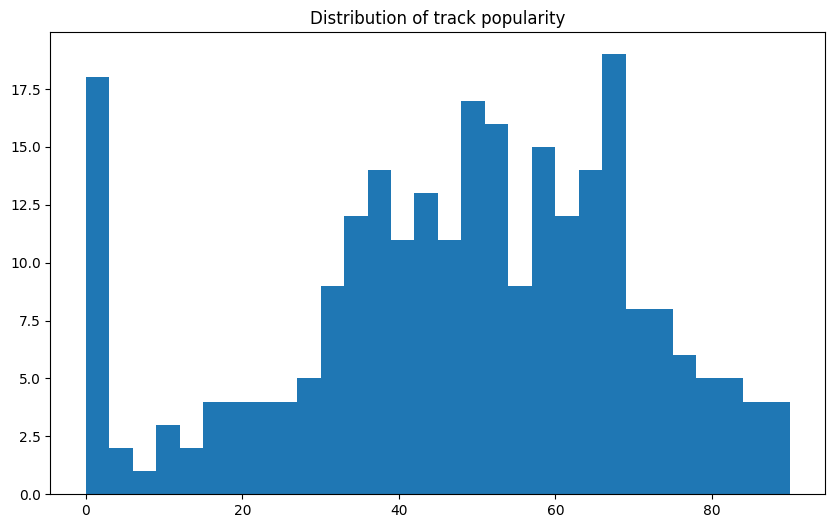

In [24]:
#histogram of track_popularity
plt.figure(figsize=(10, 6))
plt.hist(df_obama['track_popularity'], bins=30, color='#1f77b4')
plt.title('Distribution of track popularity')
plt.show()

In [25]:
df_top_100

,track_id,track_name,track_artist,track_popularity,track_album_name,track_album_release_year,duration_min,genres,record_label,danceability,...,instrumentalness,liveness,valence,tempo,time_signature,track_id_1,artist_id,artist_name,artist_followers,artist_popularity
0,0nrRP2bk19rLc0orkWPQk2,Wake Me Up,Avicii,83,TRUE,2013,4.12,EDM,Universal Music AB,53.2,...,0.12,16.10,64.30,124,4,0nrRP2bk19rLc0orkWPQk2,[1vCWHaC5f2uS3yhpwWbIA6],[Avicii],[23107521],[81]
1,0lYBSQXN6rCTvUZvg9S0lU,Let Me Love You,"DJ Snake,Justin Bieber",83,Encore,2016,3.43,EDM,DJ Snake Def Jam,47.5,...,0.00,13.50,15.90,200,4,0lYBSQXN6rCTvUZvg9S0lU,"[540vIaP2JwjQb9dm3aArA4, 1uNFoZAHBGtllmzznpCI3s]","[DJ Snake, Justin Bieber]","[8910877, 78641625]","[79, 91]"
2,7BqHUALzNBTanL6OvsqmC1,Happier,"Marshmello,Bastille",82,Happier,2018,3.57,EDM,Joytime Collective,68.7,...,0.00,16.70,67.10,100,4,7BqHUALzNBTanL6OvsqmC1,"[64KEffDW9EtZ1y2vBYgq8T, 7EQ0qTo7fWT7DPxmxtSYEc]","[Marshmello, Bastille]","[33882258, 5582338]","[84, 76]"
3,2YWjW3wwQIBLNhxWKBQd16,Lean On (feat. MØ & DJ Snake),"Major Lazer,MØ,DJ Snake",77,Peace Is The Mission : Extended,2015,2.94,EDM,Third Pardee Records,72.3,...,0.12,56.50,27.40,98,4,2YWjW3wwQIBLNhxWKBQd16,"[738wLrAtLtCtFOLvQBXOXp, 0bdfiayQAKewqEvaU6rXC...","[Major Lazer, MØ, DJ Snake]","[6206097, 1458940, 8910877]","[77, 72, 79]"
4,4cktbXiXOapiLBMprHFErI,Memories,Maroon 5,81,JORDI (Deluxe),2021,3.16,Pop,Interscope Records*,77.5,...,0.00,8.21,59.50,91,4,4cktbXiXOapiLBMprHFErI,[04gDigrS5kc9YWfZHwBETP],[Maroon 5],[43145812],[87]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0u2P5u6lvoDfwTYjAADbn4,lovely (with Khalid),"Billie Eilish,Khalid",86,lovely (with Khalid),2018,3.34,Pop/R&B,Darkroom,35.1,...,0.00,9.50,12.00,115,4,0u2P5u6lvoDfwTYjAADbn4,"[6qqNVTkY8uBg9cP3Jd7DAH, 6LuN9FCkKOj5PcnpouEgny]","[Billie Eilish, Khalid]","[102057941, 16425608]","[96, 85]"
96,5KReHDo8W8w9bKTY3KxPy3,Let Her Go,Passenger,53,Let Her Go (EP),2012,4.21,Folk-Pop,Embassy of Music,47.9,...,0.00,9.63,24.30,75,4,5KReHDo8W8w9bKTY3KxPy3,[0gadJ2b9A4SKsB1RFkBb66],[Passenger],[3419887],[72]
97,7yq4Qj7cqayVTp3FF9CWbm,Riptide,Vance Joy,78,Dream Your Life Away,2014,3.40,Folk-Pop,F-Stop Records/Atlantic,48.4,...,0.00,15.10,51.00,102,4,7yq4Qj7cqayVTp3FF9CWbm,[10exVja0key0uqUkk6LJRT],[Vance Joy],[3199643],[78]
98,3hRV0jL3vUpRrcy398teAU,The Night We Met,Lord Huron,88,Strange Trails,2015,3.47,Indie Folk,Play It Again Sam,44.8,...,27.20,63.80,9.98,174,3,3hRV0jL3vUpRrcy398teAU,[6ltzsmQQbmdoHHbLZ4ZN25],[Lord Huron],[1765546],[78]


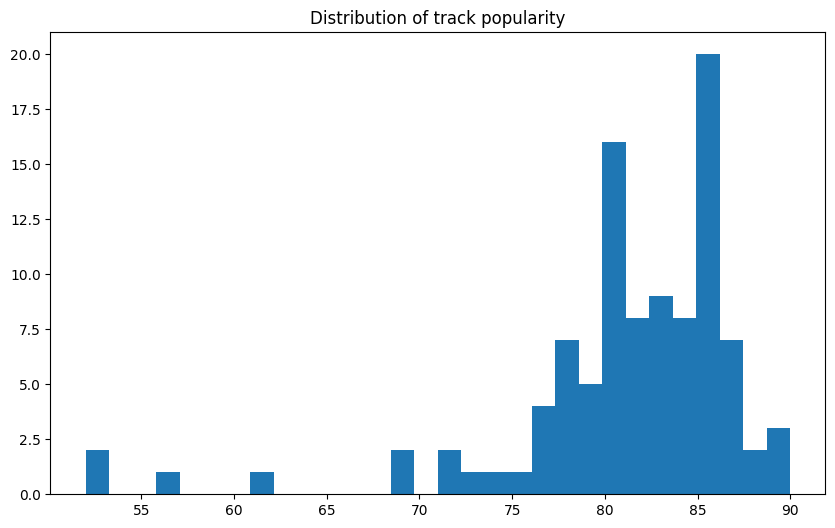

In [26]:
#histogram of track_popularity
plt.figure(figsize=(10, 6))
plt.hist(df_top_100['track_popularity'], bins=30, color='#1f77b4')
plt.title('Distribution of track popularity')
plt.show()

In [ ]:
pip install scipy

In [27]:
import scipy.stats as stats

In [28]:
res_obama = stats.shapiro(df_obama['track_popularity'])
res_obama.statistic

np.float64(0.963626048751672)

the value 0,96 for the Obama Playlists suggests a normal distribution


In [29]:
res_top_100 = stats.shapiro(df_top_100['track_popularity'])
res_top_100.statistic

np.float64(0.7753147088145892)

Is the difference between Obama track_popularity and top_100 track_popularity statistically significant?

In [32]:
#Perform T-Test
t_score, p_value = stats.ttest_ind(a=df_obama['track_popularity'], b=df_top_100['track_popularity'], equal_var=True)
print(f'p-value: {p_value}')


p-value: 1.2184751745257097e-39


## Artist Followers

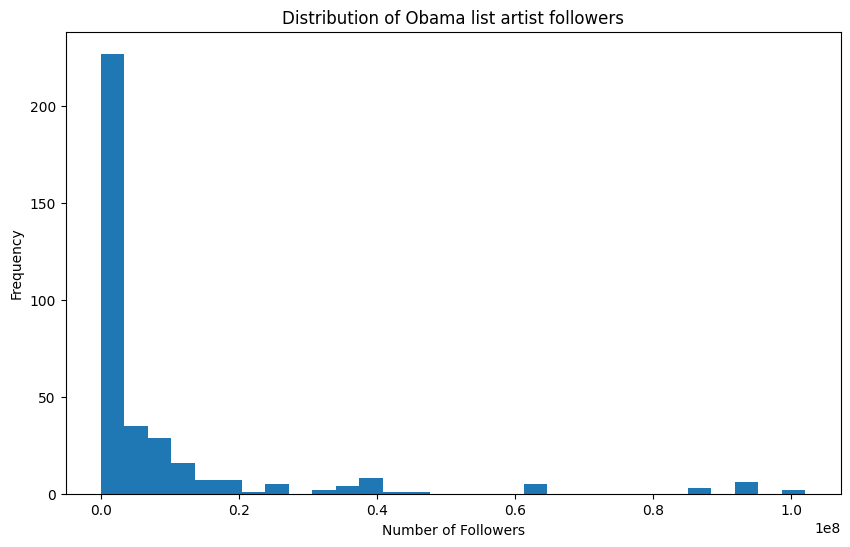

In [41]:
# Flatten the artist_followers list
all_artist_followers_1 = [follower for sublist in df_obama['artist_followers'] for follower in sublist]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(all_artist_followers_1, bins=30, color='#1f77b4')
plt.title('Distribution of Obama list artist followers')
plt.xlabel('Number of Followers')
plt.ylabel('Frequency')
plt.show()

In [42]:
res_obama_art_followers = stats.shapiro(all_artist_followers_1)
res_obama_art_followers.statistic

np.float64(0.49680256220938124)

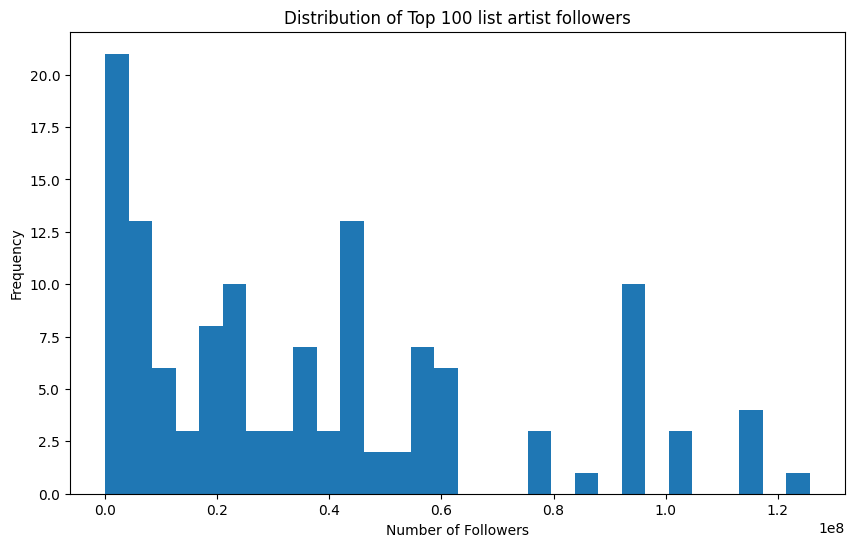

In [43]:
all_artist_followers_2 = [follower for sublist in df_top_100['artist_followers'] for follower in sublist]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(all_artist_followers_2, bins=30, color='#1f77b4')
plt.title('Distribution of Top 100 list artist followers')
plt.xlabel('Number of Followers')
plt.ylabel('Frequency')
plt.show()

In [44]:
res_top_100_art_followers = stats.shapiro(all_artist_followers_2)
res_top_100_art_followers.statistic

np.float64(0.8943897255934165)

## Valence

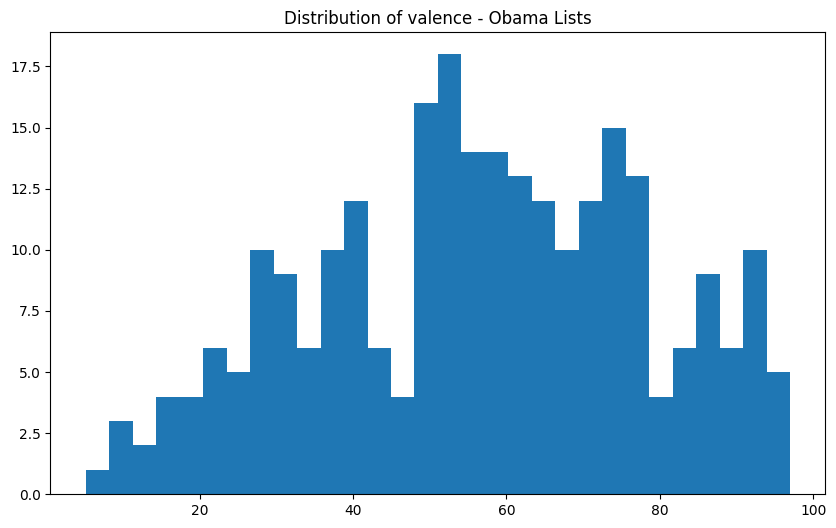

In [46]:
#histogram of valence
plt.figure(figsize=(10, 6))
plt.hist(df_obama['valence'], bins=30, color='#1f77b4')
plt.title('Distribution of valence - Obama Lists')
plt.show()

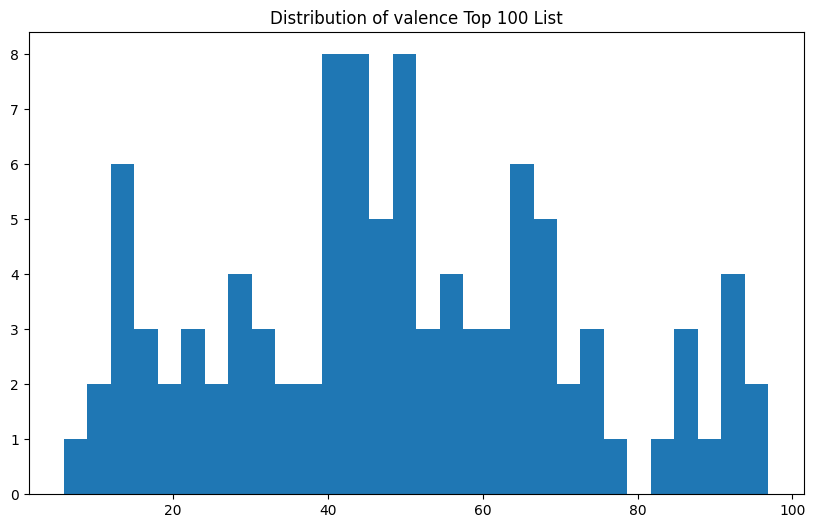

In [47]:
#histogram of valence
plt.figure(figsize=(10, 6))
plt.hist(df_top_100['valence'], bins=30, color='#1f77b4')
plt.title('Distribution of valence Top 100 List')
plt.show()

In [48]:
res_valence_obama = stats.shapiro(df_obama['valence'])
res_valence_obama.statistic

np.float64(0.9810544931534704)

In [49]:
res_valence_top_100 = stats.shapiro(df_top_100['valence'])
res_valence_top_100.statistic

np.float64(0.9749247702210769)

In [50]:
#Perform T-Test
t_score, p_value = stats.ttest_ind(a=df_obama['valence'], b=df_top_100['valence'], equal_var=True)
print(f'p-value: {p_value}')

p-value: 0.0036062999426881162
